In [4]:
#Imports
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.optimizers import SGD
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from roboflow import Roboflow
import PIL
import PIL.Image
import pathlib
from tensorflow.keras.preprocessing import image
import cv2
from PIL import Image
from pathlib import Path
import random
import shutil
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import InputLayer
#from google.colab.patches import cv2_imshow
import time

import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
%matplotlib inline

seed_value = 1337
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

In [ ]:
def rename_file(directory, old_filename, new_filename):
    old_filepath = os.path.join(directory, old_filename)
    new_filepath = os.path.join(directory, new_filename)
    os.rename(old_filepath, new_filepath)

train_folder_str = "/content/Bolts-4/train"
testing_folder_str = "/content/Bolts-4/testing/"

train_folder = Path(train_folder_str)
testing_folder = Path(testing_folder_str)
percentage = 0.2

#rename folders to numbers
rename_file(train_folder,"hex","0")
rename_file(train_folder,"hex_line","1")
rename_file(train_folder,"nothing","2")
rename_file(train_folder,"screw","3")
rename_file(train_folder,"square","4")

# Iterate over the subfolders in the train folder
for root, dirs, files in os.walk(train_folder):
    # Calculate the number of files to move from the current subfolder
    num_files = len(files)
    num_files_to_move = int(num_files * percentage)

    # Randomly select the files to move
    files_to_move = random.sample(files, num_files_to_move)

    # Move the selected files to the testing folder while preserving the subfolder structure
    for file in files_to_move:
        src = os.path.join(root, file)
        dst = os.path.join(testing_folder, os.path.relpath(src, train_folder))
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.move(src, dst)


In [ ]:


train_folder = "/Bolts-4/train/"
testing_folder = "/Bolts-4/testing/"

train_images = []
train_labels = []
test_images = []
test_labels = []

dims = (32,24)

for j in range(2): # train and test
		for i in range(5): # 0 to 9
			if j == 0:
				read_folder = train_folder + str(i) + '/'
			if j == 1:
				read_folder = testing_folder + str(i) + '/'
			for filename in os.listdir(read_folder):
				img_arr = []
				img = cv2.imread(os.path.join(read_folder,filename),0) # read img as grayscale
				img = cv2.resize(img, dims, interpolation = cv2.INTER_AREA)	# resize img to fit dims

				for k in range(dims[1]):
					for y in range(dims[0]):
						img_arr.append(img[k][y])



				img_arr = np.array(img_arr)/255.0
				img_arr = np.asarray(img_arr).astype('float32')
				#img_arr = np.reshape(img_arr, (1,-1))
				if img_arr is not None:
					if j == 0:
						train_images.append(img_arr) # normalize pixel vals to be between 0 - 1
						train_labels.append(i)
					if j == 1:
						test_images.append(img_arr)
						test_labels.append(i)



In [ ]:
## Convert to numpy arrays, flatten images - change dimensions from Nx10x10 to Nx100
train_images = np.asarray(train_images).astype('float32')
test_images = np.asarray(test_images).astype('float32')
train_labels = np.asarray(train_labels).astype('uint8')
test_labels = np.asarray(test_labels).astype('uint8')


In [ ]:

print(test_images.shape)

(2669, 768)


In [ ]:
## Shuffle dataset
train_images, train_labels = shuffle(train_images, train_labels)
test_images, test_labels = shuffle(test_images, test_labels)

In [ ]:
## Define network structure
dims1 = 768

model = Sequential([
  Dense(32, input_shape=(768,), activation='relu', use_bias=False, dtype='float32'),	# dense layer 1
  Dense(16, activation='relu', use_bias=False, dtype='float32'),	# dense layer 2
  Dense(5, activation='softmax', use_bias=False, dtype='float32'),	# dense layer 3
])

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])


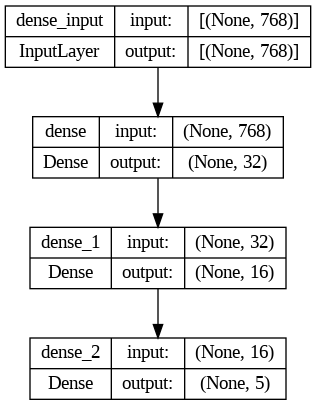

In [ ]:
dot_img_file = '/tmp/model_1.png'
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
## Train network
history = model.fit(train_images, train_labels, epochs=400, batch_size=500, validation_data=(test_images, test_labels))

Epoch 1/400
22/22 [==============================] - 1s 18ms/step - loss: 0.9994 - accuracy: 0.7197 - val_loss: 0.8166 - val_accuracy: 0.7808
Epoch 2/400
22/22 [==============================] - 0s 7ms/step - loss: 0.7851 - accuracy: 0.7807 - val_loss: 0.7485 - val_accuracy: 0.7808
Epoch 3/400
22/22 [==============================] - 0s 8ms/step - loss: 0.7258 - accuracy: 0.7816 - val_loss: 0.7015 - val_accuracy: 0.7808
Epoch 4/400
22/22 [==============================] - 0s 11ms/step - loss: 0.6791 - accuracy: 0.7909 - val_loss: 0.6482 - val_accuracy: 0.8082
Epoch 5/400
22/22 [==============================] - 0s 11ms/step - loss: 0.6312 - accuracy: 0.8057 - val_loss: 0.6113 - val_accuracy: 0.8134
Epoch 6/400
22/22 [==============================] - 0s 11ms/step - loss: 0.5976 - accuracy: 0.8154 - val_loss: 0.5833 - val_accuracy: 0.8265
Epoch 7/400
22/22 [==============================] - 0s 11ms/step - loss: 0.5709 - accuracy: 0.8265 - val_loss: 0.5634 - val_accuracy: 0.8213
Epoch 8/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                24576     
                                                                 
 dense_1 (Dense)             (None, 16)                512       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
Total params: 25168 (98.31 KB)
Trainable params: 25168 (98.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


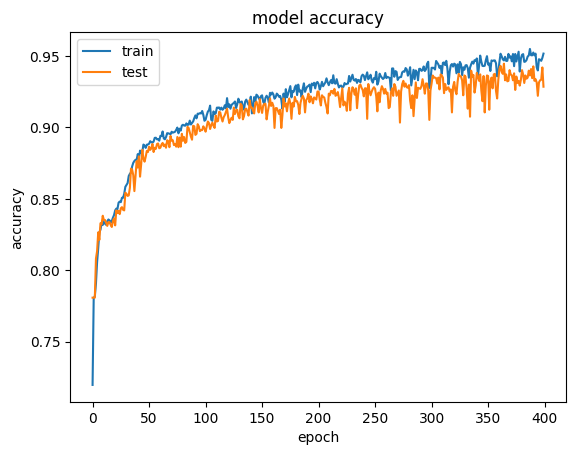

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

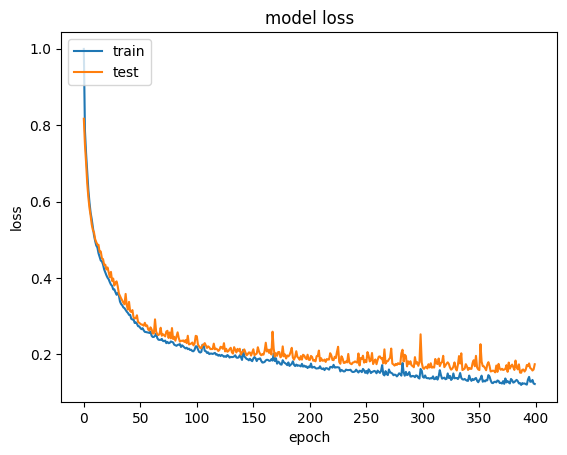

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
start_t = time.time()
results = model.evaluate(test_images, test_labels, verbose=0)
totalt_t = time.time() - start_t
print("Inference time for ", len(test_images), " test image: " , totalt_t, " seconds")


print("test loss, test acc: ", results)

Inference time for  2669  test image:  0.2316288948059082  seconds
test loss, test acc:  [0.17419449985027313, 0.9284375905990601]


In [ ]:

np.set_printoptions(precision=16)

## Retrieve network weights after training. Skip layer 0 (input layer)
for w in range(0, len(model.layers)):
		weight_filename = "layer_" + str(w) + "_weights.txt"
		open(weight_filename, 'w').close() # clear file
		file = open(weight_filename,"a")
		file.write('{')
		for i in range(model.layers[w].weights[0].numpy().shape[0]):
			file.write('{')
			for j in range(model.layers[w].weights[0].numpy().shape[1]):
				file.write(str(model.layers[w].weights[0].numpy()[i][j]))
				if j != model.layers[w].weights[0].numpy().shape[1]-1:
					file.write(', ')
			file.write('}')
			if i != model.layers[w].weights[0].numpy().shape[0]-1:
				file.write(', \n')
		file.write('}')
		file.close()

network_weights = model.layers[1].weights
#print(network_weights)
layer_1_W = network_weights[0].numpy()
#print(layer_1_W)

In [ ]:
class_names = ['0', '1', '2', '3', '4']
print(class_names)

['0', '1', '2', '3', '4']


In [ ]:


dims = (32,24)

test_files = [
'/content/Bolts-4/train/0/0008817_png.rf.506fea406cabcafbf0f51e357cd603d0.jpg',
'/content/Bolts-4/train/0/0008836_png.rf.738861d6b132050c7f98f74d90129287.jpg',
'/content/Bolts-4/train/0/0009671_png.rf.c0c816551c511d131c7ed0cf7925c5ad.jpg',
'/content/Bolts-4/train/0/0008816_png.rf.615ccd2b03bc348ff397be46752e068b.jpg',
'/content/Bolts-4/train/1/0010501_png.rf.dcb9e5f5c40e53065632ebb916caeca2.jpg',
'/content/Bolts-4/train/1/0012211_png.rf.456953d733460763e6fbbd0f52b709e6.jpg',
'/content/Bolts-4/train/1/0011393_png.rf.0a961a1b2d2a5cbbc51575d8010fe27b.jpg',
'/content/Bolts-4/train/1/0011835_png.rf.465a89d5c5cf5a986f36e9ad36e7fccf.jpg',
'/content/Bolts-4/train/2/0006194_png.rf.d42d65196711e6c2e8eecd7657ab6868.jpg',
'/content/Bolts-4/train/2/0006186_png.rf.5e664ab0a7d3770268ac61035c7c8789.jpg',
'/content/Bolts-4/train/2/0008725_png.rf.9caa8c1cdf186d307890ffec10c60e93.jpg',
'/content/Bolts-4/train/2/img131_png.rf.962f96423c60fbbb126b445a5d824ccf.jpg',
'/content/Bolts-4/train/3/0006741_png.rf.a5dc1c1fcff5b5b7686329a243dcbc2e.jpg',
'/content/Bolts-4/train/3/0005092_png.rf.7521dd611038e5def2dec6578c3327fe.jpg',
'/content/Bolts-4/train/3/0005019_png.rf.7cb57f919c6288950403663c63197905.jpg',
'/content/Bolts-4/train/3/0006787_png.rf.2199f3fa034ab7169e02133845c01e2c.jpg',
'/content/Bolts-4/train/4/0009750_png.rf.c643e64b7718b562beea86632688d6ab.jpg',
'/content/Bolts-4/train/4/0009706_png.rf.67ebc57be8b0a49c51e79b835568783a.jpg',
'/content/Bolts-4/train/4/0009883_png.rf.31931ffd9d1d60ec6de90c8e1ab8cbcf.jpg',
'/content/Bolts-4/train/4/0009983_png.rf.fe79a44aff3ec523fd03def44ad28487.jpg'
  ]


single_result = []
result = []
count = 0

for file_pat_right_here in test_files:
  count += 1
  image_to_test = cv2.imread(file_pat_right_here,0)
  if image_to_test is None:
    file_pat_right_here = file_pat_right_here.replace("/train/", "/testing/")
    image_to_test = cv2.imread(file_pat_right_here,0)

  image_to_test = cv2.resize(image_to_test, dims, interpolation = cv2.INTER_AREA)
  #cv2_imshow(image_to_test)

  testim = mpimg.imread(file_pat_right_here)
  #imshow(testim)

  best_image = []

  for i in range(dims[1]):
    for j in range(dims[0]):
      best_image.append(image_to_test[i][j])



  bestnp = np.array(best_image)/255.0
  bestnp = np.asarray(bestnp).astype('float32')
  bestnp = np.reshape(bestnp, (1,-1))

  #print(bestnp.shape)
  predictions = model.predict(bestnp)

  #print(img_array)
  score = tf.nn.softmax(predictions[0])

  #print(score)

  single_result.append(class_names[np.argmax(score)])
  if (count == 4):
    count = 0
    result.append(single_result)
    single_result = []
  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )


1/1 [==============================] - 0s 61ms/step
This image most likely belongs to 1 with a 26.89 percent confidence.
1/1 [==============================] - 0s 32ms/step
This image most likely belongs to 0 with a 31.79 percent confidence.
1/1 [==============================] - 0s 116ms/step
This image most likely belongs to 0 with a 31.15 percent confidence.
1/1 [==============================] - 0s 68ms/step
This image most likely belongs to 0 with a 33.61 percent confidence.
1/1 [==============================] - 0s 38ms/step
This image most likely belongs to 0 with a 33.95 percent confidence.
1/1 [==============================] - 0s 90ms/step
This image most likely belongs to 1 with a 28.51 percent confidence.
1/1 [==============================] - 0s 38ms/step
This image most likely belongs to 1 with a 34.52 percent confidence.
1/1 [==============================] - 0s 81ms/step
This image most likely belongs to 0 with a 34.40 percent confidence.
1/1 [==========================

In [ ]:




imgarrayfromcpp = [0.68235296, 0.6745098, 0.68235296, 0.68235296, 0.69411767, 0.69803923, 0.69411767, 0.68235296, 0.6666667, 0.6627451, 0.6627451, 0.65882355, 0.6745098, 0.6784314, 0.6627451, 0.60784316, 0.5019608, 0.41568628, 0.41568628, 0.6039216, 0.7019608, 0.7176471, 0.7411765, 0.7529412, 0.75686276, 0.7647059, 0.7764706, 0.75686276, 0.7607843, 0.7607843, 0.76862746, 0.78039217, 0.6901961, 0.69803923, 0.70980394, 0.69803923, 0.69411767, 0.7058824, 0.7058824, 0.7019608, 0.6745098, 0.6784314, 0.6745098, 0.6627451, 0.654902, 0.6745098, 0.654902, 0.5882353, 0.4862745, 0.42352942, 0.42745098, 0.56078434, 0.6784314, 0.70980394, 0.7137255, 0.7411765, 0.7490196, 0.74509805, 0.74509805, 0.75686276, 0.7529412, 0.75686276, 0.77254903, 0.7607843, 0.6431373, 0.7137255, 0.72156864, 0.72156864, 0.7254902, 0.70980394, 0.7019608, 0.69411767, 0.6901961, 0.6862745, 0.69411767, 0.6784314, 0.654902, 0.6666667, 0.6431373, 0.5921569, 0.54509807, 0.5176471, 0.52156866, 0.59607846, 0.6627451, 0.69803923, 0.7058824, 0.72156864, 0.7490196, 0.73333335, 0.7411765, 0.7411765, 0.7529412, 0.75686276, 0.7607843, 0.7647059, 0.5019608, 0.7058824, 0.73333335, 0.73333335, 0.73333335, 0.7254902, 0.7176471, 0.7137255, 0.70980394, 0.7176471, 0.69803923, 0.6745098, 0.6666667, 0.7058824, 0.7921569, 0.85490197, 0.8862745, 0.8901961, 0.89411765, 0.89411765, 0.8627451, 0.8039216, 0.72156864, 0.70980394, 0.7058824, 0.7294118, 0.7294118, 0.7294118, 0.7254902, 0.7254902, 0.7176471, 0.70980394, 0.42745098, 0.6039216, 0.7372549, 0.7372549, 0.7411765, 0.74509805, 0.73333335, 0.73333335, 0.73333335, 0.70980394, 0.6862745, 0.6901961, 0.8039216, 0.8784314, 0.88235295, 0.8745098, 0.87058824, 0.8745098, 0.8745098, 0.8784314, 0.8784314, 0.8745098, 0.8627451, 0.8039216, 0.69803923, 0.72156864, 0.7176471, 0.7294118, 0.7176471, 0.6862745, 0.6784314, 0.6862745, 0.40784314, 0.47843137, 0.6666667, 0.7607843, 0.7529412, 0.7529412, 0.75686276, 0.74509805, 0.7294118, 0.69411767, 0.72156864, 0.85882354, 0.85882354, 0.8392157, 0.81960785, 0.8156863, 0.8156863, 0.80784315, 0.8039216, 0.79607844, 0.7882353, 0.77254903, 0.7607843, 0.74509805, 0.7294118, 0.6745098, 0.7019608, 0.7137255, 0.7058824, 0.7019608, 0.6627451, 0.6666667, 0.3882353, 0.45490196, 0.6431373, 0.7647059, 0.78431374, 0.7647059, 0.7607843, 0.7490196, 0.7294118, 0.7372549, 0.81960785, 0.654902, 0.6509804, 0.64705884, 0.64705884, 0.64705884, 0.6431373, 0.64705884, 0.6431373, 0.6313726, 0.6156863, 0.6039216, 0.5921569, 0.5803922, 0.5764706, 0.70980394, 0.7019608, 0.70980394, 0.7019608, 0.6862745, 0.65882355, 0.65882355, 0.38039216, 0.4509804, 0.627451, 0.7882353, 0.77254903, 0.77254903, 0.7607843, 0.7529412, 0.7411765, 0.8627451, 0.8392157, 0.6509804, 0.6509804, 0.6509804, 0.6509804, 0.64705884, 0.64705884, 0.64705884, 0.6431373, 0.627451, 0.6156863, 0.6039216, 0.58431375, 0.5764706, 0.5686275, 0.7058824, 0.8039216, 0.68235296, 0.6862745, 0.68235296, 0.67058825, 0.6392157, 0.38039216, 0.4509804, 0.60784316, 0.7921569, 0.7882353, 0.7764706, 0.7921569, 0.7607843, 0.8156863, 0.9137255, 0.83137256, 0.65882355, 0.654902, 0.654902, 0.654902, 0.6509804, 0.654902, 0.64705884, 0.6392157, 0.62352943, 0.6117647, 0.59607846, 0.58431375, 0.57254905, 0.5647059, 0.68235296, 0.8509804, 0.73333335, 0.68235296, 0.6784314, 0.65882355, 0.62352943, 0.38039216, 0.45490196, 0.654902, 0.8156863, 0.8039216, 0.8, 0.7764706, 0.7882353, 0.88235295, 0.8980392, 0.81960785, 0.6666667, 0.6627451, 0.65882355, 0.6627451, 0.6666667, 0.67058825, 0.6666667, 0.654902, 0.63529414, 0.6117647, 0.6, 0.5803922, 0.5686275, 0.5647059, 0.6745098, 0.84705883, 0.8039216, 0.67058825, 0.67058825, 0.67058825, 0.6156863, 0.4, 0.45882353, 0.7058824, 0.8156863, 0.81960785, 0.81960785, 0.8117647, 0.81960785, 0.9098039, 0.88235295, 0.81960785, 0.67058825, 0.67058825, 0.6666667, 0.6666667, 0.6745098, 0.6745098, 0.6666667, 0.654902, 0.6313726, 0.6117647, 0.59607846, 0.58431375, 0.5686275, 0.5647059, 0.6627451, 0.8392157, 0.8392157, 0.6745098, 0.65882355, 0.6627451, 0.61960787, 0.41568628, 0.4862745, 0.78431374, 0.8392157, 0.84705883, 0.8156863, 0.81960785, 0.85490197, 0.9137255, 0.88235295, 0.81960785, 0.6745098, 0.6745098, 0.6745098, 0.6745098, 0.6784314, 0.6784314, 0.67058825, 0.64705884, 0.6313726, 0.6156863, 0.6, 0.58431375, 0.5686275, 0.56078434, 0.654902, 0.83137256, 0.8392157, 0.7137255, 0.64705884, 0.67058825, 0.63529414, 0.44705883, 0.58431375, 0.8627451, 0.8627451, 0.85490197, 0.84705883, 0.8352941, 0.8666667, 0.9137255, 0.8784314, 0.8235294, 0.68235296, 0.6784314, 0.6745098, 0.6784314, 0.68235296, 0.6784314, 0.6666667, 0.6509804, 0.627451, 0.6117647, 0.6, 0.5803922, 0.5686275, 0.56078434, 0.64705884, 0.827451, 0.8392157, 0.7372549, 0.64705884, 0.654902, 0.6666667, 0.48235294, 0.7921569, 0.8980392, 0.8784314, 0.8509804, 0.85490197, 0.83137256, 0.8862745, 0.91764706, 0.88235295, 0.827451, 0.6862745, 0.6784314, 0.6784314, 0.68235296, 0.68235296, 0.6784314, 0.6666667, 0.6509804, 0.63529414, 0.6156863, 0.6, 0.5803922, 0.5686275, 0.5647059, 0.63529414, 0.827451, 0.8352941, 0.7490196, 0.64705884, 0.654902, 0.6666667, 0.6745098, 0.90588236, 0.8901961, 0.8784314, 0.85882354, 0.8509804, 0.827451, 0.88235295, 0.9137255, 0.8862745, 0.83137256, 0.6901961, 0.68235296, 0.6784314, 0.6784314, 0.6745098, 0.6745098, 0.65882355, 0.6509804, 0.6313726, 0.6156863, 0.6, 0.5803922, 0.5686275, 0.56078434, 0.627451, 0.827451, 0.8392157, 0.74509805, 0.6431373, 0.6431373, 0.65882355, 0.89411765, 0.8980392, 0.9137255, 0.8901961, 0.8627451, 0.8666667, 0.8392157, 0.8666667, 0.9137255, 0.8862745, 0.8352941, 0.6901961, 0.68235296, 0.6745098, 0.6627451, 0.65882355, 0.6509804, 0.64705884, 0.6431373, 0.627451, 0.6117647, 0.6, 0.58431375, 0.5686275, 0.56078434, 0.6156863, 0.827451, 0.84313726, 0.70980394, 0.6431373, 0.6509804, 0.6627451, 0.9019608, 0.9137255, 0.9019608, 0.9019608, 0.8784314, 0.8666667, 0.8352941, 0.8627451, 0.91764706, 0.89411765, 0.84313726, 0.6901961, 0.68235296, 0.6745098, 0.6666667, 0.654902, 0.6509804, 0.6509804, 0.6431373, 0.6313726, 0.6117647, 0.6, 0.58431375, 0.57254905, 0.56078434, 0.6117647, 0.83137256, 0.84313726, 0.654902, 0.6431373, 0.654902, 0.6509804, 0.9254902, 0.9098039, 0.9019608, 0.8980392, 0.8901961, 0.87058824, 0.85490197, 0.827451, 0.8901961, 0.8980392, 0.8509804, 0.69411767, 0.68235296, 0.6745098, 0.6666667, 0.654902, 0.654902, 0.6509804, 0.6431373, 0.627451, 0.6156863, 0.6039216, 0.58431375, 0.57254905, 0.5647059, 0.6039216, 0.8392157, 0.7921569, 0.6431373, 0.6509804, 0.6509804, 0.654902, 0.93333334, 0.90588236, 0.9019608, 0.89411765, 0.8901961, 0.88235295, 0.8666667, 0.827451, 0.84313726, 0.90588236, 0.8666667, 0.69411767, 0.68235296, 0.6784314, 0.6666667, 0.654902, 0.6509804, 0.6509804, 0.6431373, 0.6313726, 0.6156863, 0.6039216, 0.5882353, 0.5764706, 0.5686275, 0.6039216, 0.84705883, 0.6784314, 0.6392157, 0.63529414, 0.6509804, 0.654902, 0.9098039, 0.9098039, 0.89411765, 0.89411765, 0.8784314, 0.8901961, 0.8666667, 0.84705883, 0.827451, 0.87058824, 0.8901961, 0.7019608, 0.6745098, 0.6745098, 0.67058825, 0.65882355, 0.6509804, 0.6509804, 0.64705884, 0.6313726, 0.6156863, 0.60784316, 0.5921569, 0.5764706, 0.5686275, 0.59607846, 0.7647059, 0.654902, 0.64705884, 0.6509804, 0.654902, 0.6431373, 0.8862745, 0.90588236, 0.8901961, 0.8862745, 0.87058824, 0.8784314, 0.87058824, 0.8392157, 0.8392157, 0.7921569, 0.8745098, 0.7607843, 0.7254902, 0.7294118, 0.7294118, 0.7294118, 0.7372549, 0.7411765, 0.7411765, 0.7411765, 0.73333335, 0.7254902, 0.7176471, 0.72156864, 0.75686276, 0.7411765, 0.6666667, 0.654902, 0.654902, 0.64705884, 0.6431373, 0.654902, 0.8745098, 0.89411765, 0.8862745, 0.8862745, 0.8745098, 0.8666667, 0.8627451, 0.8509804, 0.84705883, 0.8039216, 0.78039217, 0.8666667, 0.9098039, 0.9019608, 0.8901961, 0.8862745, 0.8862745, 0.8901961, 0.8862745, 0.8862745, 0.8784314, 0.87058824, 0.8627451, 0.8862745, 0.81960785, 0.6901961, 0.67058825, 0.6627451, 0.6627451, 0.64705884, 0.6627451, 0.65882355, 0.8745098, 0.85490197, 0.88235295, 0.87058824, 0.8627451, 0.87058824, 0.85490197, 0.84313726, 0.8392157, 0.8117647, 0.8039216, 0.78431374, 0.8156863, 0.90588236, 0.9254902, 0.91764706, 0.9137255, 0.9137255, 0.9137255, 0.9137255, 0.9137255, 0.9098039, 0.8784314, 0.78431374, 0.7019608, 0.6901961, 0.6862745, 0.67058825, 0.6745098, 0.6745098, 0.6666667, 0.6745098, 0.8627451, 0.8627451, 0.8666667, 0.85882354, 0.8666667, 0.85490197, 0.85882354, 0.84705883, 0.83137256, 0.8117647, 0.80784315, 0.79607844, 0.7764706, 0.7882353, 0.8117647, 0.87058824, 0.9019608, 0.91764706, 0.91764706, 0.89411765, 0.8509804, 0.78431374, 0.73333335, 0.72156864, 0.70980394, 0.7019608, 0.69411767, 0.6901961, 0.6862745, 0.68235296, 0.68235296, 0.6784314]

bestnp = np.array(imgarrayfromcpp)
bestnp = np.asarray(bestnp).astype('float32')
bestnp = np.reshape(bestnp, (1,-1))

reshaped_array = np.reshape(bestnp, (24,32))*255

#cv2_imshow(reshaped_array)

print(bestnp.shape)
predictions = model.predict(bestnp)
hidden_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
hidden_output = hidden_layer_model.predict(bestnp)

print(hidden_output)
score = tf.nn.softmax(predictions[0])

print(score)


In [ ]:

def apply_dense_layer(input_vector, weights, activation_func,outsize):
    z = []
    for j in range(outsize):

      sum=0
      for k in range(len(input_vector)):
        sum += input_vector[k]*weights[k][j]


      z.append(sum)

    # Compute the linear part of the layer
    #z = np.dot(weights.T, input_vector)
    # Pass the linear part through the activation function
    #output_vector = activation_func(z)
    return z

weights1 = model.layers[0].weights[0].numpy()
weights2 = model.layers[1].weights[0].numpy()
weights3 = model.layers[2].weights[0].numpy()
np.set_printoptions(16)
print(weights1)
# For ReLU activation function
def relu(x):
    return np.maximum(0, x)


def softmax(x):
    e_x = np.exp(x - np.max(x)) # subtract max for numerical stability
    #return e_x / e_x.sum(axis=0) # axis=0 if x is 1D, else axis=1
    return x

# Getting output
output_vector = apply_dense_layer(imgarrayfromcpp, weights1, relu,32)
#output_vector2 = apply_dense_layer(output_vector, weights2, relu,16)
#output_vector3 = apply_dense_layer(output_vector2, weights3, softmax,5)

#print(weights1)
print("\n")

print(output_vector)
print("\n")
#print(output_vector2)
print("\n")
#print(output_vector3)
